In [1]:
!pip install -q kaggle

In [4]:
!kaggle datasets download -d hereisburak/pins-face-recognition


  0%|          | 0.00/372M [00:00<?, ?B/s]
  0%|          | 1.00M/372M [00:00<05:39, 1.15MB/s]
  1%|          | 2.00M/372M [00:01<04:55, 1.31MB/s]
  1%|          | 3.00M/372M [00:02<04:37, 1.39MB/s]
  1%|1         | 4.00M/372M [00:03<04:31, 1.42MB/s]
  1%|1         | 5.00M/372M [00:03<04:30, 1.42MB/s]
  2%|1         | 6.00M/372M [00:04<04:22, 1.46MB/s]
  2%|1         | 7.00M/372M [00:05<04:19, 1.47MB/s]
  2%|2         | 8.00M/372M [00:06<04:34, 1.39MB/s]
  2%|2         | 9.00M/372M [00:06<04:29, 1.41MB/s]
  3%|2         | 10.0M/372M [00:07<04:24, 1.44MB/s]
  3%|2         | 11.0M/372M [00:08<04:21, 1.44MB/s]
  3%|3         | 12.0M/372M [00:08<04:18, 1.46MB/s]
  3%|3         | 13.0M/372M [00:09<04:17, 1.46MB/s]
  4%|3         | 14.0M/372M [00:10<04:15, 1.47MB/s]
  4%|4         | 15.0M/372M [00:11<04:31, 1.38MB/s]
  4%|4         | 16.0M/372M [00:11<04:24, 1.41MB/s]
  5%|4         | 17.0M/372M [00:12<04:20, 1.43MB/s]
  5%|4         | 18.0M/372M [00:13<04:17, 1.44MB/s]
  5%|5         | 19.

In [5]:
import zipfile

with zipfile.ZipFile('pins-face-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('105_classes_pins_dataset')

In [6]:
!pip install keras
import tensorflow as tf
import keras
from keras import layers
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 160,160 #width & height of input image
input_depth = 1 #1: gray image
epochs = 50 #number of training epoch
batch_size = 5 #training batch size

In [12]:
import os
import cv2
from PIL import Image

IMG_HEIGHT = 160
IMG_WIDTH = 160
#data_dir = '/content/dataset'
data_dir = '105_classes_pins_dataset/'
categories = os.listdir(data_dir)
NUM_CATEGORIES = len(categories)
print("Total number of classes: " + str(NUM_CATEGORIES))

image_data = []
image_labels = []

for i, category in enumerate(categories):
    path = data_dir + category
    images = os.listdir(path)

    for img in images:
        image = cv2.imread(os.path.join(path, img))
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        #image = image.astype('float32') / 255.0
        image_labels.append(category)

# Convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

Total number of classes: 105


In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have your data and labels in X and y variables

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.3, random_state=1234, shuffle=True)

# Split the test set further into validation and test sets (66.7% validation, 33.3% test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.333, random_state=1234)


In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
#Network Architecture


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))


# Add the output layer
model.add(Dense(105, activation='softmax'))


# Compile the model
#model.compile(optimizer='adam', loss=triplet_loss, metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam

lr = 0.0001
epochs = 30

opt = Adam(lr=lr, amsgrad=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 80, 80, 128)      512       
 hNormalization)                                                 
                                                        

D:\Bachelor\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert the encoded labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_encoded, num_classes=105)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=105)

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train_one_hot, batch_size=32),
                    epochs=epochs,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/30
384/384 [==============================] - 1013s 3s/step - loss: 4.6563 - accuracy: 0.0171 - val_loss: 4.5552 - val_accuracy: 0.0211
Epoch 2/30
384/384 [==============================] - 1292s 3s/step - loss: 4.4721 - accuracy: 0.0304 - val_loss: 4.3774 - val_accuracy: 0.0368
Epoch 3/30
384/384 [==============================] - 1037s 3s/step - loss: 4.3016 - accuracy: 0.0421 - val_loss: 4.2031 - val_accuracy: 0.0433
Epoch 4/30
384/384 [==============================] - 1133s 3s/step - loss: 4.0345 - accuracy: 0.0631 - val_loss: 3.8086 - val_accuracy: 0.0835
Epoch 5/30
384/384 [==============================] - 1286s 3s/step - loss: 3.7609 - accuracy: 0.0935 - val_loss: 3.6389 - val_accuracy: 0.1123
Epoch 6/30
384/384 [==============================] - 1040s 3s/step - loss: 3.5368 - accuracy: 0.1217 - val_loss: 3.4345 - val_accuracy: 0.1319
Epoch 7/30
384/384 [==============================] - 1039s 3s/step - loss: 3.3424 - accuracy: 0.1478 - val_loss: 3.4703 - val_accuracy:

In [20]:
score = model.evaluate(X_train,y_train_one_hot,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

384/384 [==============================] - 219s 565ms/step - loss: 0.1876 - accuracy: 0.9480
Accuracy: 94.80%
Loss:  0.1875728815793991


In [22]:
model.save("RecognitionModel.h5")

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7612\3679996806.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


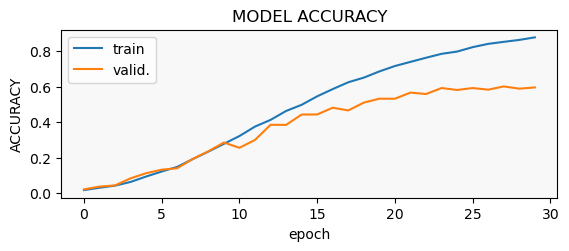

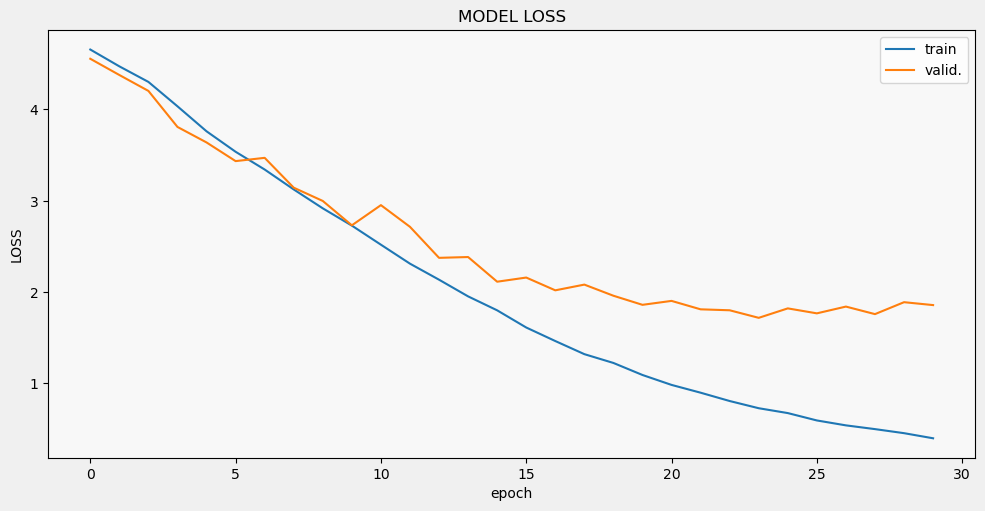

In [23]:
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)